# Задача №1: классификация зловредного ПО

In [1]:
!pip install phik

In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik import report
from phik.report import plot_correlation_matrix, correlation_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [3]:
seed = 1008

## Анализ данных (EDA)

### Загрузка данных

In [4]:
data = pd.read_csv('/content/drive/MyDrive/practicum_ml_dev/TUANDROMD.csv')

In [5]:
data.head()

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4465 entries, 0 to 4464
Columns: 242 entries, ACCESS_ALL_DOWNLOADS to Label
dtypes: float64(242)
memory usage: 8.2 MB


In [7]:
for col in data.columns:
  print(col)

ACCESS_ALL_DOWNLOADS
ACCESS_CACHE_FILESYSTEM
ACCESS_CHECKIN_PROPERTIES
ACCESS_COARSE_LOCATION
ACCESS_COARSE_UPDATES
ACCESS_FINE_LOCATION
ACCESS_LOCATION_EXTRA_COMMANDS
ACCESS_MOCK_LOCATION
ACCESS_MTK_MMHW
ACCESS_NETWORK_STATE
ACCESS_PROVIDER
ACCESS_SERVICE
ACCESS_SHARED_DATA
ACCESS_SUPERUSER
ACCESS_SURFACE_FLINGER
ACCESS_WIFI_STATE
activityCalled
ACTIVITY_RECOGNITION
ACCOUNT_MANAGER
ADD_VOICEMAIL
ANT
ANT_ADMIN
AUTHENTICATE_ACCOUNTS
AUTORUN_MANAGER_LICENSE_MANAGER
AUTORUN_MANAGER_LICENSE_SERVICE(.autorun)
BATTERY_STATS
BILLING
BIND_ACCESSIBILITY_SERVICE
BIND_APPWIDGET
BIND_CARRIER_MESSAGING_SERVICE
BIND_DEVICE_ADMIN
BIND_DREAM_SERVICE
BIND_GET_INSTALL_REFERRER_SERVICE
BIND_INPUT_METHOD
BIND_NFC_SERVICE
BIND_0TIFICATION_LISTENER_SERVICE
BIND_PRINT_SERVICE
BIND_REMOTEVIEWS
BIND_TEXT_SERVICE
BIND_TV_INPUT
BIND_VOICE_INTERACTION
BIND_VPN_SERVICE
BIND_WALLPAPER
BLUETOOTH
BLUETOOTH_ADMIN
BLUETOOTH_PRIVILEGED
BODY_SENSORS
BRICK
BROADCAST_PACKAGE_REMOVED
BROADCAST_SMS
BROADCAST_STICKY
BROADCAST

В данном датасете **241 категориальный признак**.

### Предобработка данных

#### Работа с пропусками

**Посмотрим на кол-во пропусков в данных** и удалим их, если потребуется.

In [8]:
# смотрим на количество пропусков
data.isnull().sum()

ACCESS_ALL_DOWNLOADS                                        1
ACCESS_CACHE_FILESYSTEM                                     1
ACCESS_CHECKIN_PROPERTIES                                   1
ACCESS_COARSE_LOCATION                                      1
ACCESS_COARSE_UPDATES                                       1
                                                           ..
Landroid/telephony/TelephonyManager;->getSimOperatorName    1
Landroid/telephony/TelephonyManager;->getSimCountryIso      1
Landroid/telephony/TelephonyManager;->getSimSerialNumber    1
Lorg/apache/http/impl/client/DefaultHttpClient;->execute    1
Label                                                       1
Length: 242, dtype: int64

In [9]:
data.isnull().sum().sum()

242

In [10]:
data.loc[data['Label'].isnull()]

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
2533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# легко удалим пропуски, тк они все в 1 строке
data = data.dropna()

In [12]:
data.isnull().sum().sum()

0

#### Отбор признаков

**Посмотрим на кол-во уникальных значений в столбцах**, так как возможно не все колонки имеет больше 1 уникального значения. Признаки, которые постоянны во всем датасете нет смысла использовать при обучение.

In [13]:
# посмотрим на кол-во уникальных значений в столбцах
count_unique_values_df = data.nunique().to_frame(name='count_unique_values')
default_value_features = count_unique_values_df[count_unique_values_df['count_unique_values'] == 1].index.to_list()
default_value_features

['ACCESS_PROVIDER',
 'ACCESS_SERVICE',
 'ACCESS_SHARED_DATA',
 'activityCalled',
 'ACTIVITY_RECOGNITION',
 'ANT',
 'ANT_ADMIN',
 'AUTORUN_MANAGER_LICENSE_MANAGER',
 'AUTORUN_MANAGER_LICENSE_SERVICE(.autorun)',
 'BIND_GET_INSTALL_REFERRER_SERVICE',
 'CHANGE_DISPLAY_MODE',
 'CHECK_LICENSE',
 'DATABASE_INTERFACE_SERVICE',
 'DOWNLOAD_SERVICE',
 'EXTENSION_PERMISSION',
 'FULLSCREEN.FULL',
 'GOOGLE_AUTH',
 'GOOGLE_PHOTOS',
 'JPUSH_MESSAGE',
 'MAPS_RECEIVE',
 'MESSAGE',
 'PERMISSION',
 'PERMISSION_RUN_TASKS',
 'PLUGIN',
 'READ',
 'READ_ATTACHMENT',
 'READ_AVESTTINGS',
 'READ_CONTENT_PROVIDER',
 'READ_DATA',
 'READ_DATABASES',
 'READ_GMAIL',
 'READ_GSERVICES',
 'READ_MESSAGES',
 'RECEIVE',
 'RECEIVE_SIGNED_DATA_RESULT',
 'RESPOND',
 'REQUEST',
 'SEND',
 'WRITE',
 'WRITE_AVSETTING',
 'WRITE_DATA',
 'WRITE_DATABASES']

In [14]:
# удалим признаки, которые не меняют свое значение
data.drop(default_value_features, axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4464 entries, 0 to 4464
Columns: 200 entries, ACCESS_ALL_DOWNLOADS to Label
dtypes: float64(200)
memory usage: 6.8 MB


**Посмотрим как признаки вообще коррелируют с таргетом.**

Для получения матрицы корреляций используем **библиотеку Phik**, которая работает как с числовыми, так и с категориальными признаками, а также способна улавливать не только линейные зависимости.

In [15]:
interval_cols = []

In [16]:
phik_overview = data.phik_matrix(interval_cols=[])

In [17]:
phik_overview = phik_overview.loc[phik_overview['Label'] > 0.2]
phik_overview = phik_overview[phik_overview.index.to_list()]
phik_overview

,ACCESS_COARSE_LOCATION,ACCESS_FINE_LOCATION,ACCESS_NETWORK_STATE,BLUETOOTH,BLUETOOTH_ADMIN,CHANGE_NETWORK_STATE,DISABLE_KEYGUARD,DOWNLOAD_WITHOUT_0TIFICATION,GET_TASKS,KILL_BACKGROUND_PROCESSES,...,Landroid/location/LocationManager;->getLastK0wnLocation,Landroid/content/pm/PackageManager;->getInstalledApplications,Landroid/content/pm/PackageManager;->getInstalledPackages,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Label
ACCESS_COARSE_LOCATION,1.000000,0.978326,0.344115,0.697427,0.702129,0.614593,0.029606,0.332159,0.056564,0.181058,...,0.603383,0.409342,0.427778,0.245359,0.226318,0.258227,0.609678,0.527340,0.294556,0.405126
ACCESS_FINE_LOCATION,0.978326,1.000000,0.336509,0.684763,0.680673,0.610452,0.000000,0.322962,0.087290,0.201602,...,0.631848,0.362996,0.418156,0.267978,0.240787,0.252961,0.601696,0.552169,0.260736,0.418741
ACCESS_NETWORK_STATE,0.344115,0.336509,1.000000,0.240817,0.229003,0.302403,0.088006,0.082468,0.400241,0.662276,...,0.395735,0.332509,0.255085,0.639951,0.603121,0.388143,0.364899,0.293070,0.430979,0.200100
BLUETOOTH,0.697427,0.684763,0.240817,1.000000,0.994911,0.847937,0.202167,0.227251,0.000000,0.078430,...,0.249190,0.117859,0.196522,0.136173,0.083664,0.162802,0.227603,0.255384,0.151279,0.258438
BLUETOOTH_ADMIN,0.702129,0.680673,0.229003,0.994911,1.000000,0.864068,0.231659,0.243552,0.003506,0.118800,...,0.220121,0.109186,0.161671,0.109271,0.052000,0.142179,0.179114,0.219407,0.107479,0.206412
CHANGE_NETWORK_STATE,0.614593,0.610452,0.302403,0.847937,0.864068,1.000000,0.217548,0.370140,0.000000,0.111068,...,0.227898,0.180696,0.154768,0.266998,0.181384,0.323357,0.341846,0.405673,0.252814,0.293154
DISABLE_KEYGUARD,0.029606,0.000000,0.088006,0.202167,0.231659,0.217548,1.000000,0.042486,0.639487,0.798543,...,0.260444,0.126687,0.133369,0.381623,0.382512,0.248996,0.234761,0.166961,0.327247,0.391605
DOWNLOAD_WITHOUT_0TIFICATION,0.332159,0.322962,0.082468,0.227251,0.243552,0.370140,0.042486,1.000000,0.000000,0.000000,...,0.223753,0.070320,0.231181,0.103417,0.078921,0.127886,0.166344,0.156050,0.094223,0.211004
GET_TASKS,0.056564,0.087290,0.400241,0.000000,0.003506,0.000000,0.639487,0.000000,1.000000,0.900418,...,0.532803,0.100139,0.206415,0.103608,0.000000,0.512619,0.319837,0.246315,0.592024,0.773009
KILL_BACKGROUND_PROCESSES,0.181058,0.201602,0.662276,0.078430,0.118800,0.111068,0.798543,0.000000,0.900418,1.000000,...,0.483458,0.281049,0.269856,0.662664,0.631237,0.397309,0.362598,0.244095,0.505588,0.634451


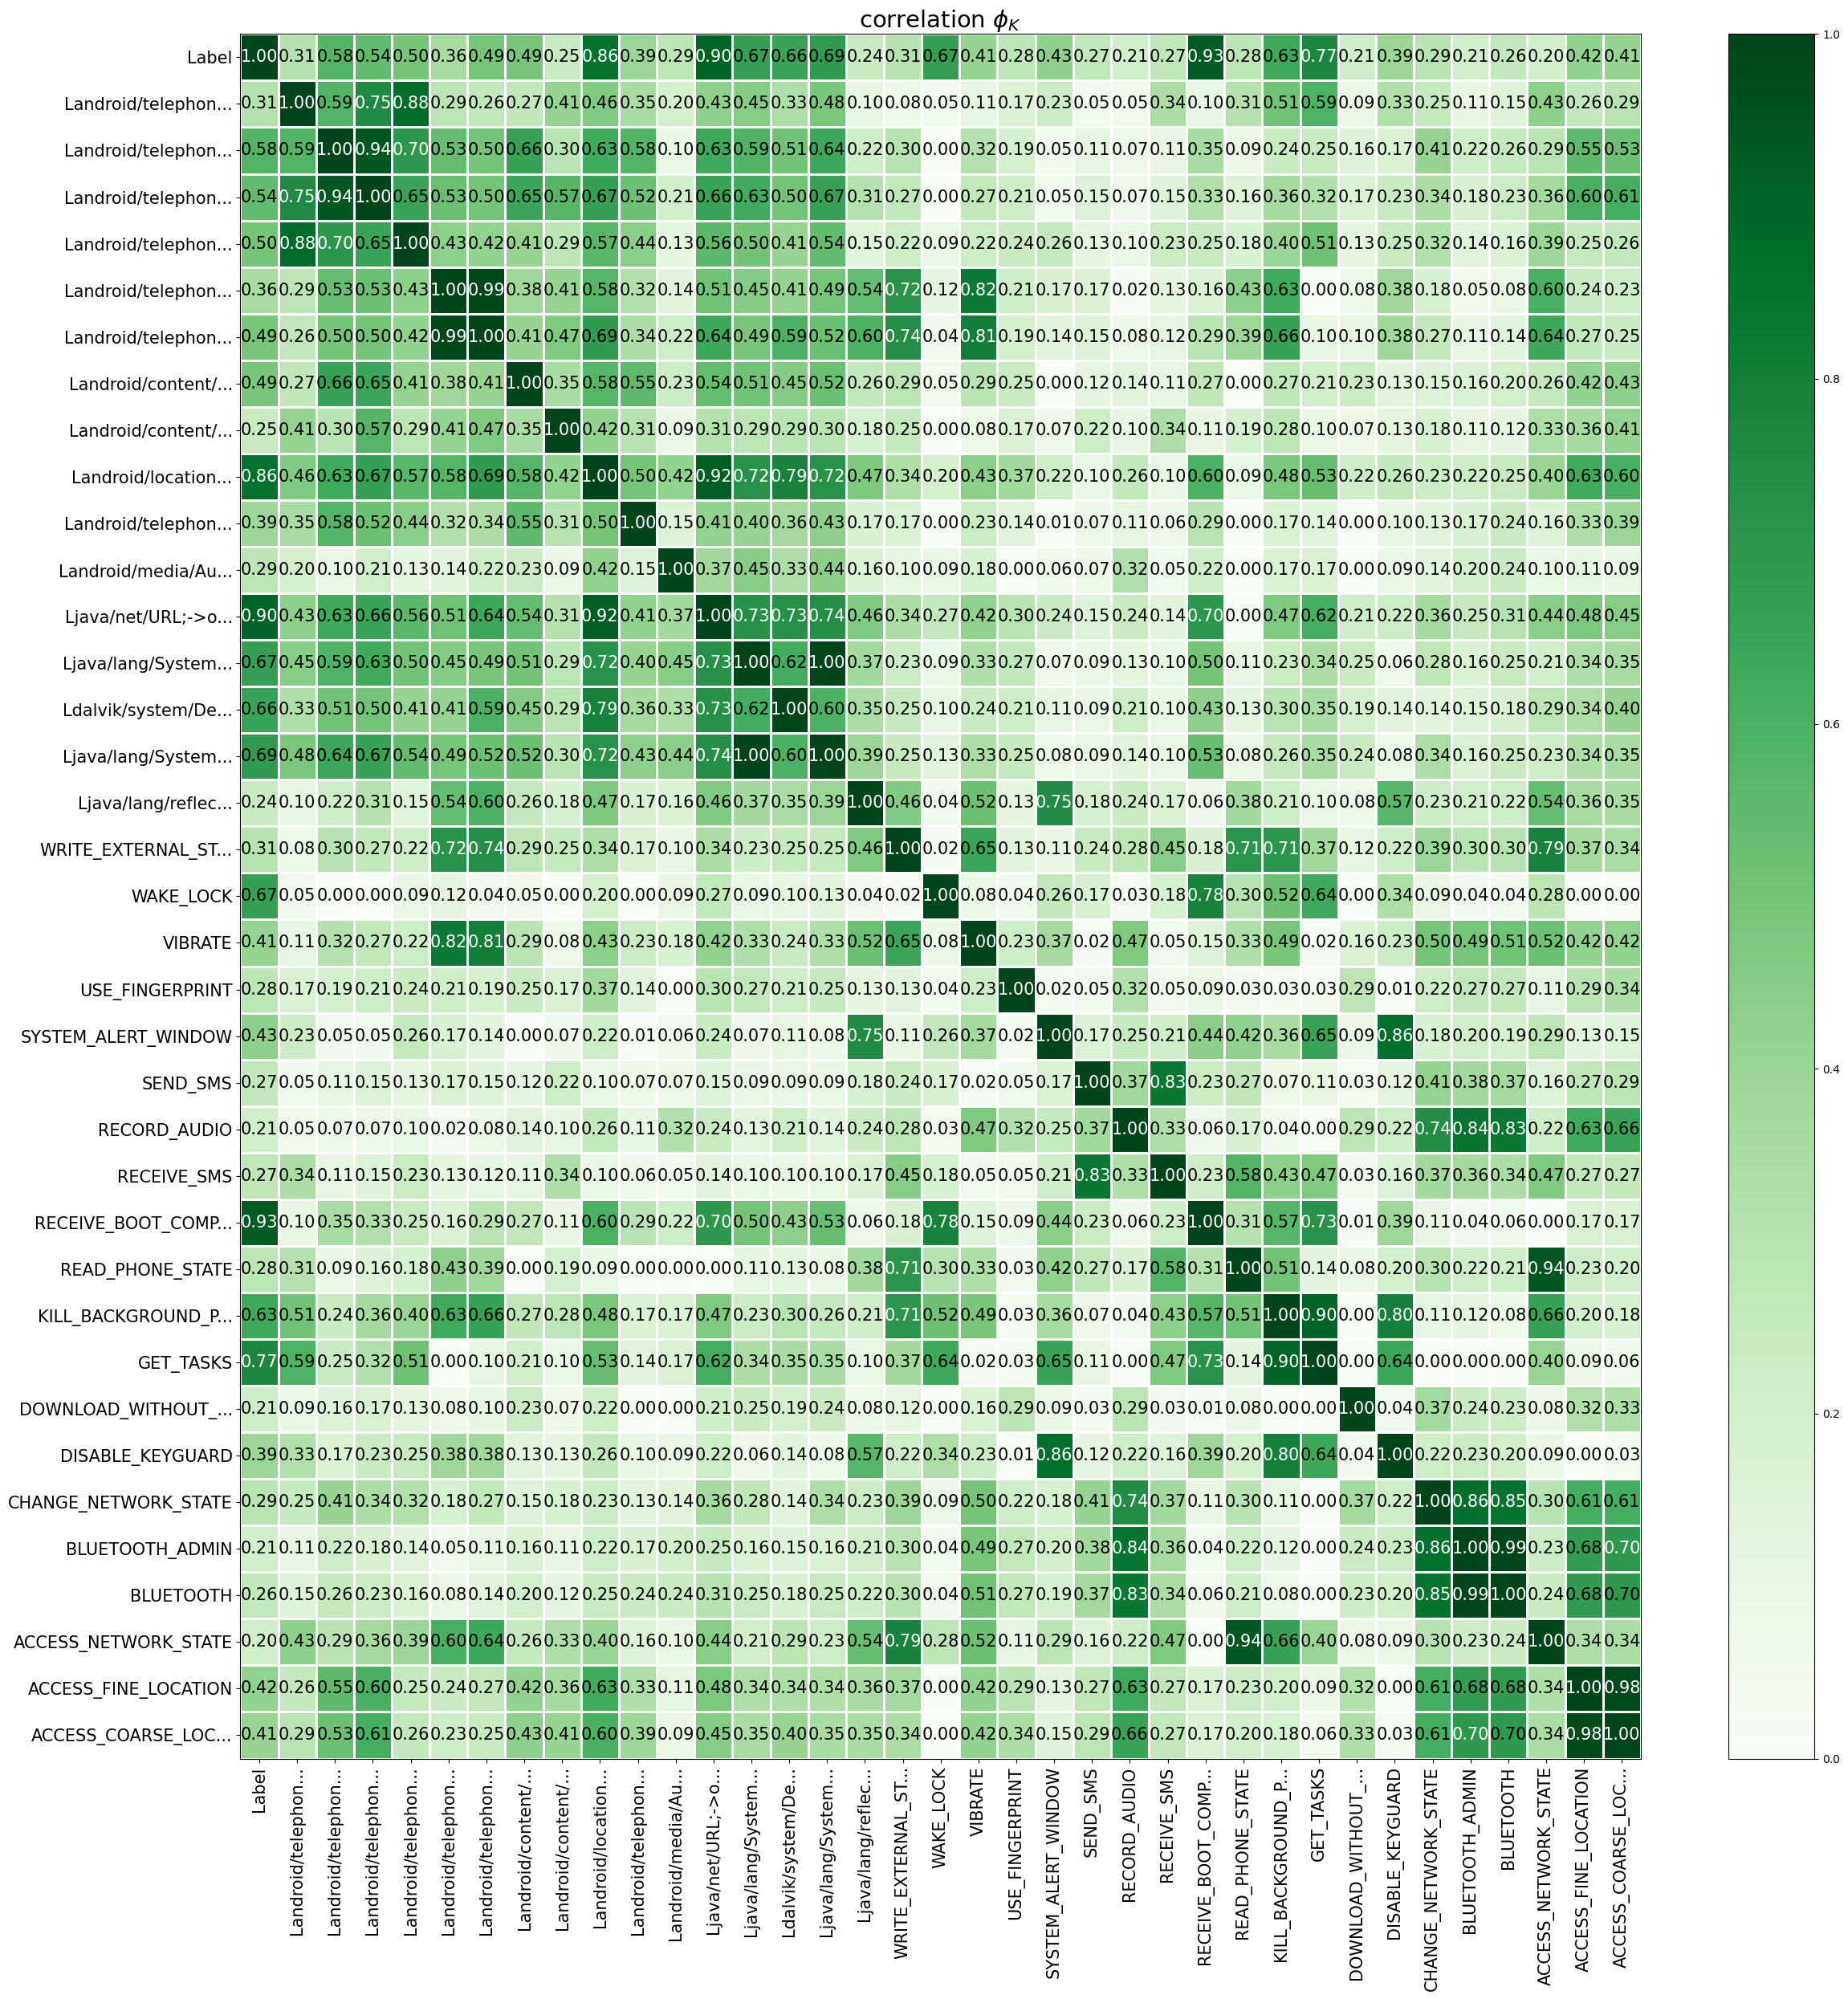

In [18]:
plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map='Greens',
                        title=r'correlation $\phi_K$',
                        fontsize_factor=1.5,
                        figsize=(25, 25))
plt.tight_layout()

- Сразу уберем признаки, которые слабо коррелируют с таргетом
- На основе матрице корреляций отберем признаки, которые сильно коррелируют друг с другом, и оставим из таких пар только те, которые имеют большую корреляцию с таргетом

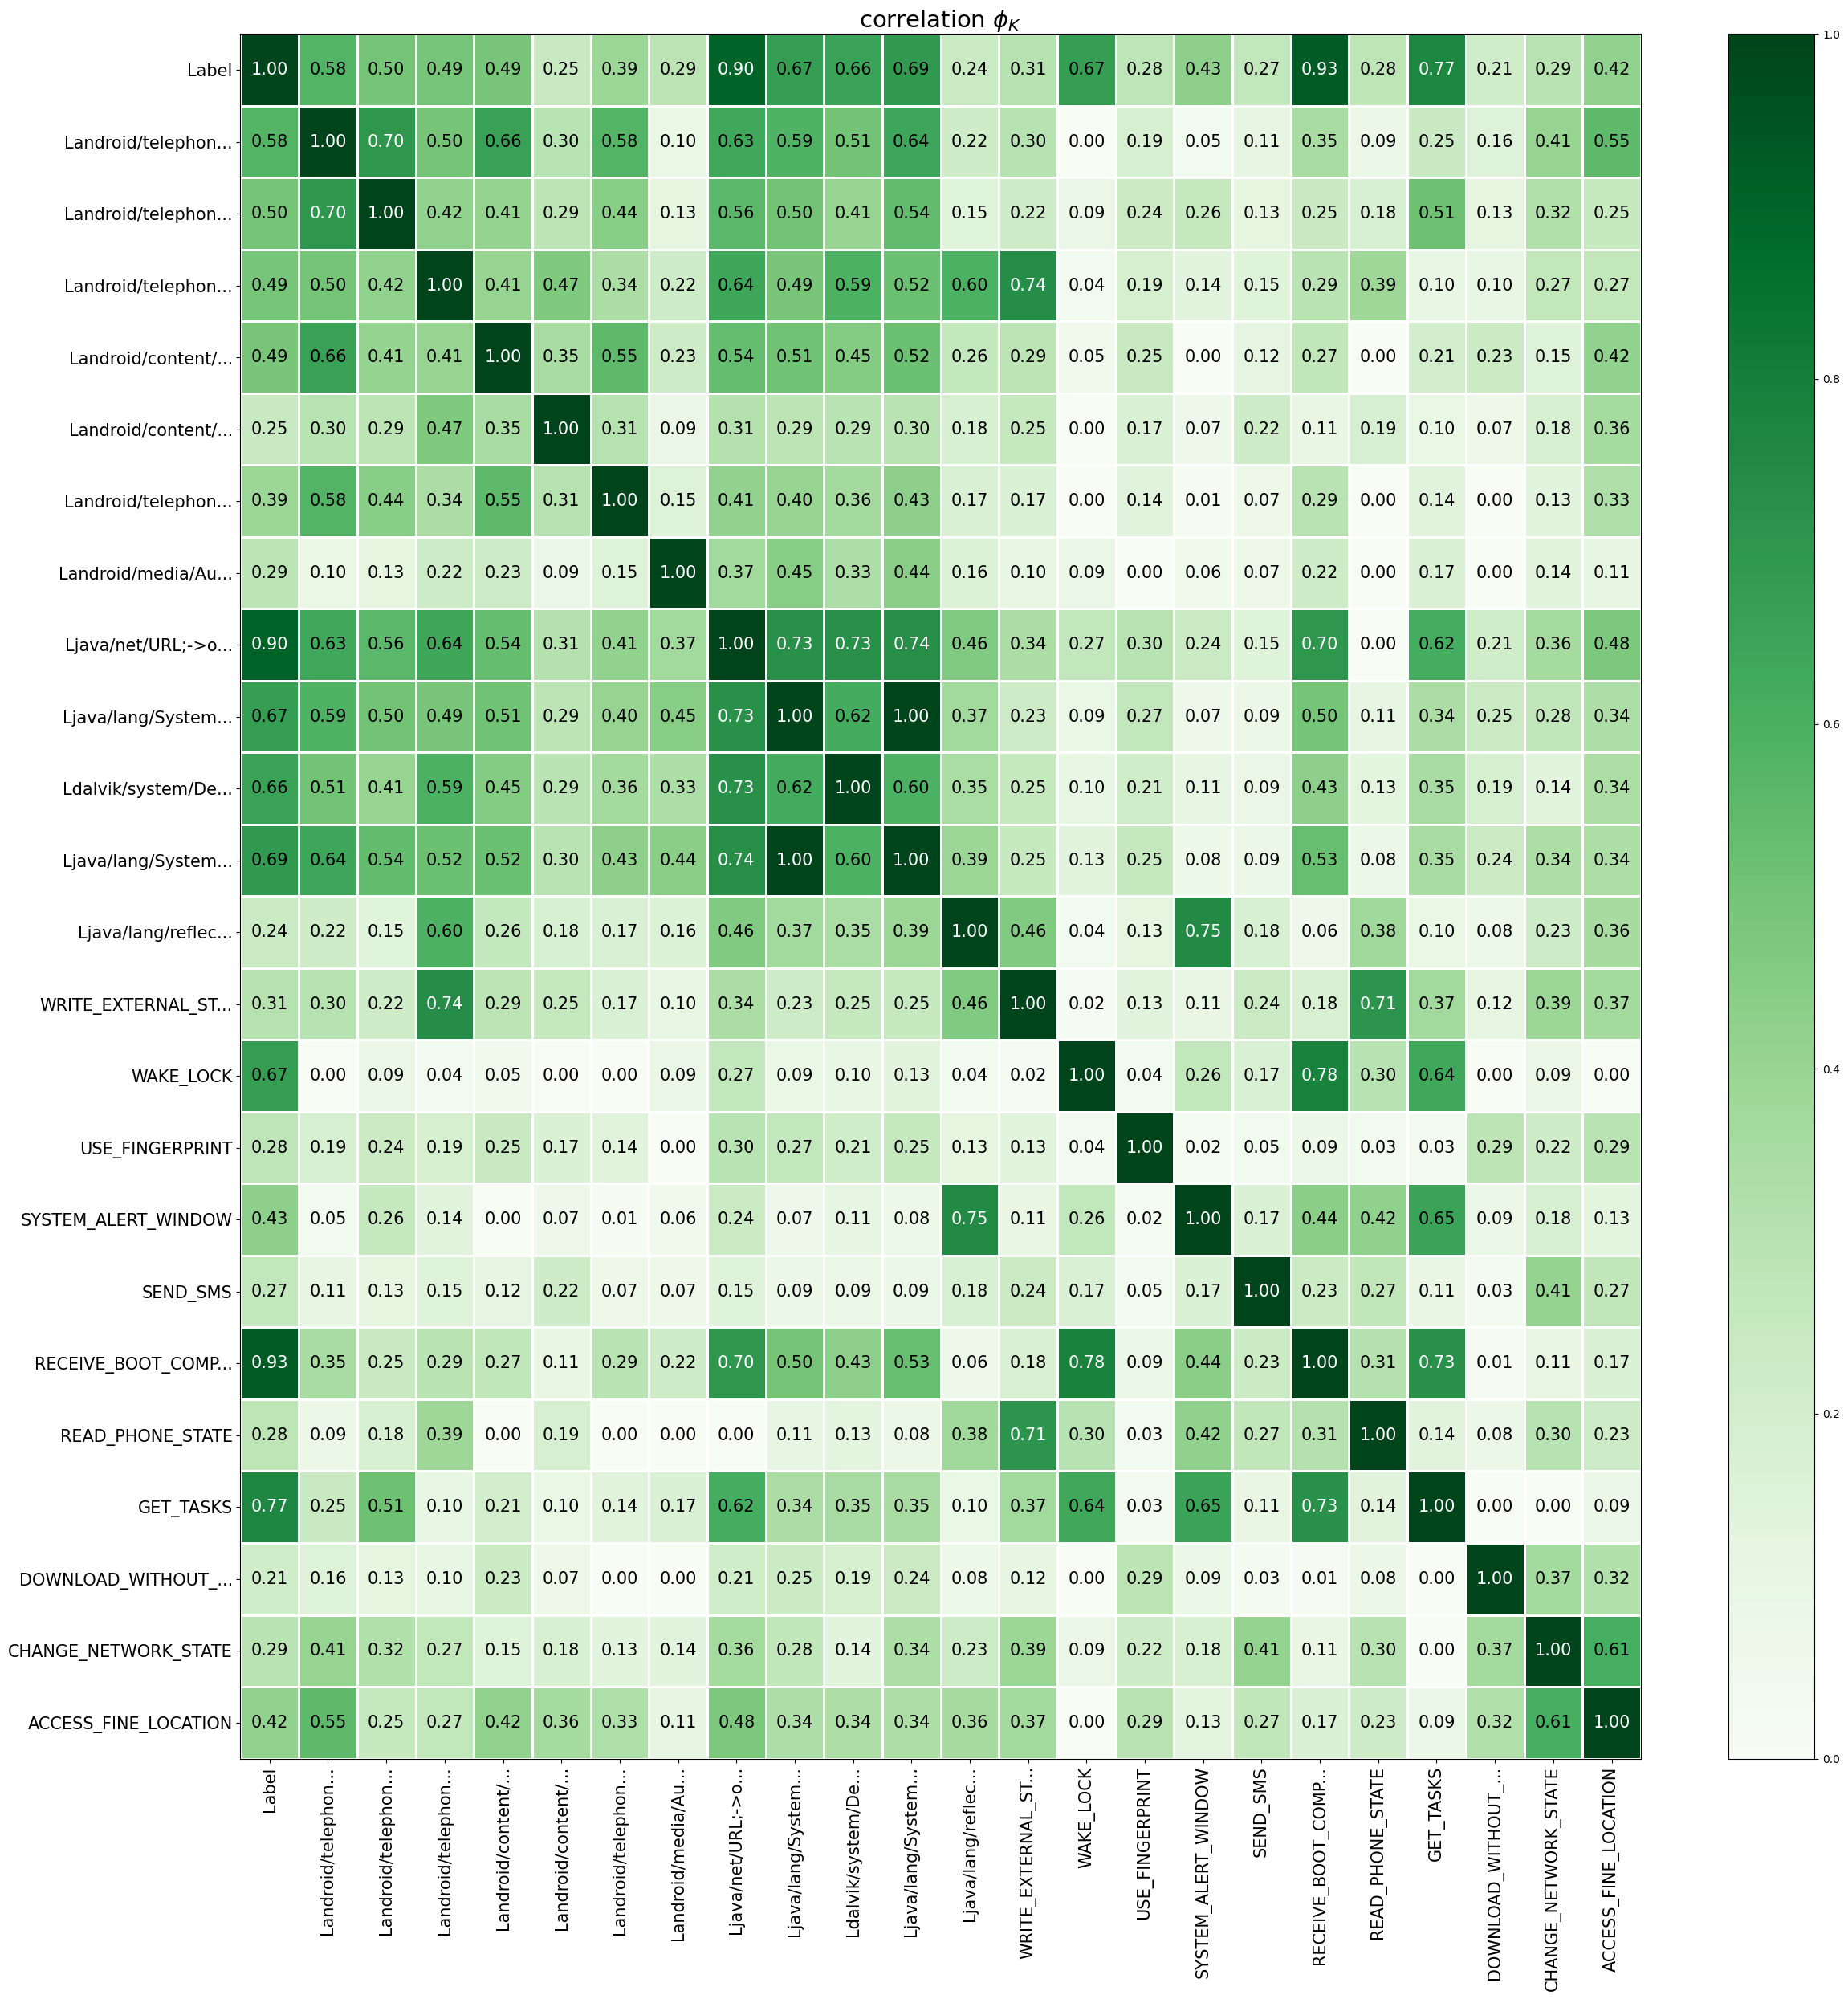

In [19]:
col_to_drop = [
    'Landroid/telephony/TelephonyManager;->getSimCountryIso',
    'Landroid/telephony/TelephonyManager;->getSimOperator',
    'Landroid/telephony/TelephonyManager;->getNetworkOperatorName',
    'Landroid/location/LocationManager;->getLastK0wnLocation',
    'VIBRATE',
    'DISABLE_KEYGUARD',
    'RECEIVE_SMS',
    'RECORD_AUDIO',
    'BLUETOOTH',
    'BLUETOOTH_ADMIN',
    'ACCESS_NETWORK_STATE',
    'KILL_BACKGROUND_PROCESSES',
    'ACCESS_COARSE_LOCATION'
]
phik_overview = phik_overview.drop(col_to_drop, axis=1)
phik_overview = phik_overview.drop(col_to_drop)
plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map='Greens',
                        title=r'correlation $\phi_K$',
                        fontsize_factor=1.5,
                        figsize=(25, 25))
plt.tight_layout()

In [20]:
data = data[phik_overview.index.to_list()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4464 entries, 0 to 4464
Data columns (total 24 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   ACCESS_FINE_LOCATION                                           4464 non-null   float64
 1   CHANGE_NETWORK_STATE                                           4464 non-null   float64
 2   DOWNLOAD_WITHOUT_0TIFICATION                                   4464 non-null   float64
 3   GET_TASKS                                                      4464 non-null   float64
 4   READ_PHONE_STATE                                               4464 non-null   float64
 5   RECEIVE_BOOT_COMPLETED                                         4464 non-null   float64
 6   SEND_SMS                                                       4464 non-null   float64
 7   SYSTEM_ALERT_WINDOW                                         

#### Проверим есть ли дисбаланс классов

In [21]:
data['Label'].unique()

array([1., 0.])

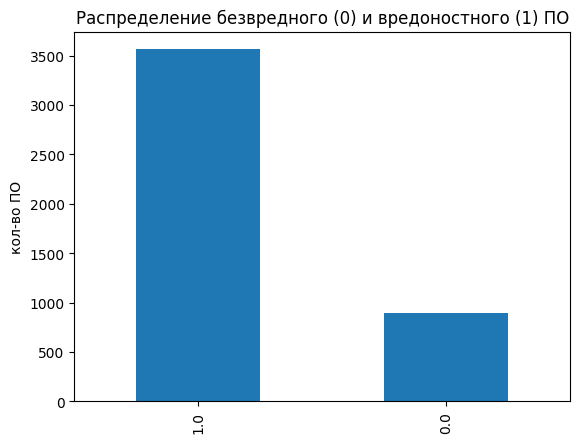

In [22]:
data['Label'].value_counts().plot(kind='bar')
plt.title("Распределение безвредного (0) и вредоностного (1) ПО")
plt.ylabel("кол-во ПО")
plt.show()
plt.show()

###  Разделяем датасет на выборки (трейн и тест)

In [23]:
target = data['Label']
features = data.drop(['Label'], axis = 1)

In [24]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, stratify=data['Label'], random_state=seed)

In [25]:
print(features_train.shape, target_train.shape)
print(features_test.shape, target_test.shape)

(3571, 23) (3571,)
(893, 23) (893,)


## Кросс-валидация для выбора лучших гипер-параметров моделей

Будем обучать следующие модели:


*   LogisticRegression
*   RandomForest
*   LGBMClassifier

Для каждой модели проведем подбор гиперпараметров. Во все модели будем добавлять веса классов, чтобы бороться с несбалансированной выборкой.



### LogisticRegression

In [26]:
%%time

model_log_reg = LogisticRegression(class_weight='balanced', random_state=seed)

params_grid_log_reg = {'C': [0.001,0.01,0.1,1,10,100,1000]}

grid_log_reg = GridSearchCV(
    model_log_reg,
    param_grid=params_grid_log_reg,
    scoring='f1',
    n_jobs=-1,
    verbose=1)

grid_log_reg.fit(features_train, target_train)

best_model_log_reg = grid_log_reg.best_estimator_
best_parametrs_log_reg = grid_log_reg.best_params_
best_result_log_reg = grid_log_reg.best_score_

Fitting 5 folds for each of 7 candidates, totalling 35 fits
CPU times: user 171 ms, sys: 60.6 ms, total: 231 ms
Wall time: 1.85 s


In [27]:
print(best_result_log_reg) # лучший результат модели
print(best_parametrs_log_reg) # лучшие параметры модели

0.9822403354946105
{'C': 100}


In [28]:
predictions_test = best_model_log_reg.predict(features_test)

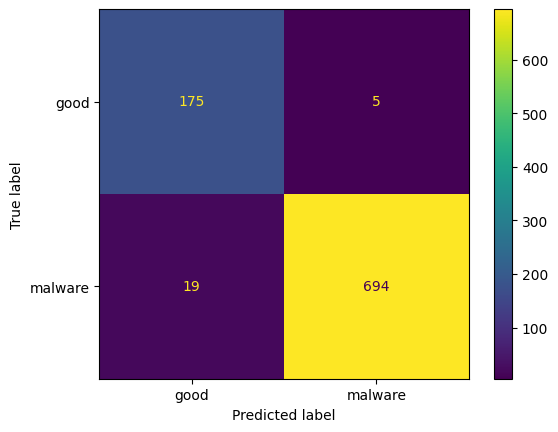

In [29]:
# матрица ошибок
cm = confusion_matrix(target_test, predictions_test)
disp = ConfusionMatrixDisplay(cm, display_labels=['good', 'malware']).plot()

In [30]:
# метрики модели
print(classification_report(target_test, predictions_test, target_names=['good', 'malware']))

              precision    recall  f1-score   support

        good       0.90      0.97      0.94       180
     malware       0.99      0.97      0.98       713

    accuracy                           0.97       893
   macro avg       0.95      0.97      0.96       893
weighted avg       0.97      0.97      0.97       893



### RandomForestClassifier

In [31]:
%%time

model_forest = RandomForestClassifier(class_weight='balanced', random_state=seed)

params_grid_forest = {'n_estimators': range(100, 250, 50),
                      'max_depth': range(2, 15)}

grid_forest = GridSearchCV(
    model_forest,
    param_grid=params_grid_forest,
    scoring='f1',
    n_jobs=-1,
    verbose=1)

grid_forest.fit(features_train, target_train)

best_model_forest = grid_forest.best_estimator_
best_parametrs_forest = grid_forest.best_params_
best_result_forest = grid_forest.best_score_

Fitting 5 folds for each of 39 candidates, totalling 195 fits
CPU times: user 2.15 s, sys: 224 ms, total: 2.37 s
Wall time: 1min 14s


In [32]:
print(best_result_forest) # лучший результат модели
print(best_parametrs_forest) # лучшие параметры модели

0.9922516158132073
{'max_depth': 13, 'n_estimators': 200}


In [33]:
predictions_test = best_model_forest.predict(features_test)

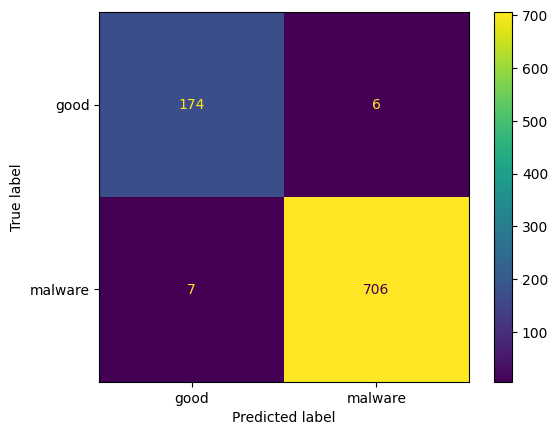

In [34]:
# матрица ошибок
cm = confusion_matrix(target_test, predictions_test)
disp = ConfusionMatrixDisplay(cm, display_labels=['good', 'malware']).plot()

In [35]:
# метрики модели
print(classification_report(target_test, predictions_test, target_names=['good', 'malware']))

              precision    recall  f1-score   support

        good       0.96      0.97      0.96       180
     malware       0.99      0.99      0.99       713

    accuracy                           0.99       893
   macro avg       0.98      0.98      0.98       893
weighted avg       0.99      0.99      0.99       893



### LGBMClassifier

In [36]:
%%time

model_lgb = LGBMClassifier(class_weight='balanced', random_state=seed)

params_grid_lgb = {'n_estimators': range(100, 250, 50),
                   'max_depth': range(2, 15),
                   'num_leaves': range(15, 25)}

grid_lgb = GridSearchCV(
    model_lgb,
    param_grid=params_grid_lgb,
    scoring='f1',
    n_jobs=-1,
    verbose=1)

grid_lgb.fit(features_train, target_train)

best_model_lgb = grid_lgb.best_estimator_
best_parametrs_lgb = grid_lgb.best_params_
best_result_lgb = grid_lgb.best_score_

Fitting 5 folds for each of 390 candidates, totalling 1950 fits
[LightGBM] [Info] Number of positive: 2852, number of negative: 719
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000987 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 44
[LightGBM] [Info] Number of data points in the train set: 3571, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
CPU times: user 6.57 s, sys: 656 ms, total: 7.23 s
Wall time: 2min 55s


In [37]:
print(best_result_lgb) # лучший результат модели
print(best_parametrs_lgb) # лучшие параметры модели

0.9924340347104799
{'max_depth': 11, 'n_estimators': 150, 'num_leaves': 22}


In [38]:
predictions_test = best_model_lgb.predict(features_test)

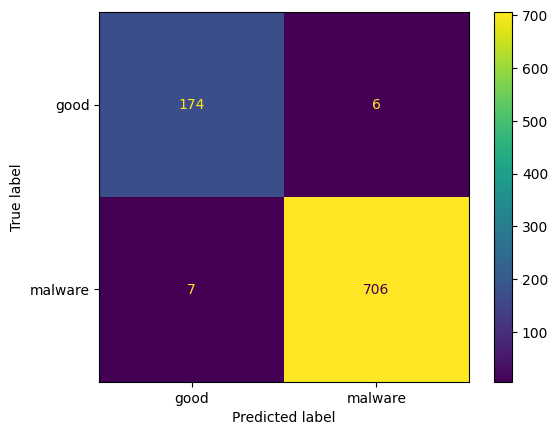

In [39]:
# матрица ошибок
cm = confusion_matrix(target_test, predictions_test)
disp = ConfusionMatrixDisplay(cm, display_labels=['good', 'malware']).plot()

In [40]:
# метрики модели
print(classification_report(target_test, predictions_test, target_names=['good', 'malware']))

              precision    recall  f1-score   support

        good       0.96      0.97      0.96       180
     malware       0.99      0.99      0.99       713

    accuracy                           0.99       893
   macro avg       0.98      0.98      0.98       893
weighted avg       0.99      0.99      0.99       893



## Обучаем модели с лучшими параметрами на всем датасете и сохраняем их

In [41]:
MODEL_PATH = "/content/drive/MyDrive/practicum_ml_dev/models"

### LogisticRegression

In [42]:
log_reg = LogisticRegression(C=100, class_weight='balanced', random_state=seed, n_jobs=-1)
log_reg.fit(features, target)

LogisticRegression(C=100, class_weight='balanced', n_jobs=-1, random_state=1008)

In [43]:
pickle.dump(log_reg, open(f"{MODEL_PATH}/log_reg_model.pkl", "wb"))

### RandomForestClassifier

In [44]:
forest = RandomForestClassifier(max_depth=13, n_estimators=200, class_weight='balanced', random_state=seed, n_jobs=-1)
forest.fit(features, target)

RandomForestClassifier(class_weight='balanced', max_depth=13, n_estimators=200,
                       n_jobs=-1, random_state=1008)

In [45]:
pickle.dump(forest, open(f"{MODEL_PATH}/forest_model.pkl", "wb"))

### LGBMClassifier

In [46]:
lgb_model = LGBMClassifier(max_depth=11, n_estimators=150, num_leaves=22, class_weight='balanced', random_state=seed, n_jobs=-1)
lgb_model.fit(features, target)

[LightGBM] [Info] Number of positive: 3565, number of negative: 899
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000920 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 46
[LightGBM] [Info] Number of data points in the train set: 4464, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


LGBMClassifier(class_weight='balanced', max_depth=11, n_estimators=150,
               n_jobs=-1, num_leaves=22, random_state=1008)

In [47]:
pickle.dump(lgb_model, open(f"{MODEL_PATH}/lgb_model.pkl", "wb"))